<a href="https://colab.research.google.com/github/Sreemaee21/Projects/blob/main/Textual_data_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#**Representing Textual Data**


*Text classification or Text Categorization is the activity of labeling natural language texts with relevant categories from a predefined set.* In laymen terms, text classification is a process of extracting generic tags from unstructured text. These generic tags come from a set of pre-defined categories. 

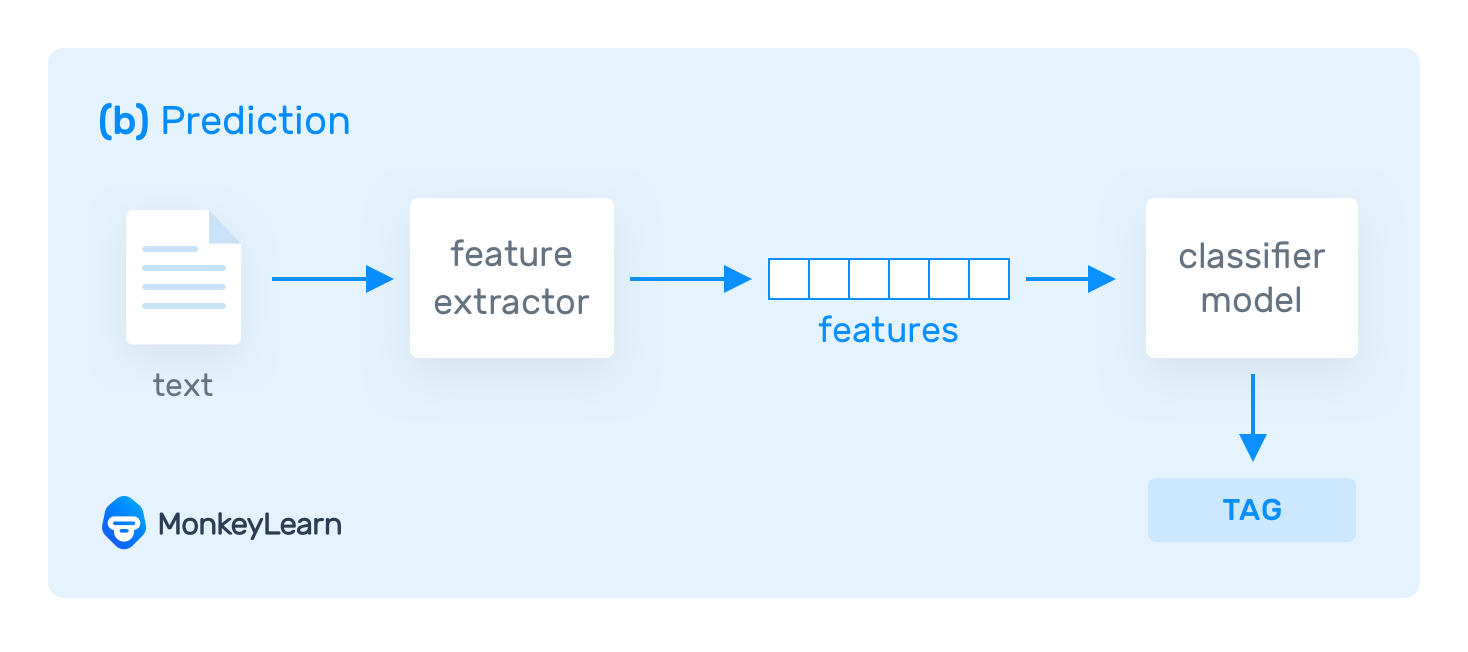

Classifying large textual data helps in standardizing the platform, make search easier and relevant, and improves user experience by simplifying navigation. 
So as part of this project, we’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.

The dataset is broken into 1490 records for training and 735 for testing. The goal will be to build a system that can accurately classify previously unseen news articles into the right category.

### Imports
Let's start by importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Data Understanding 
To begin with, we will load the Train Data which contains the categories of articles and understand this data.

In [ ]:
# Loading the BBC News Train.csv file 
train_data = pd.read_csv("https://raw.githubusercontent.com/SP9144/FMML_Project_Lec8/main/BBC%20News%20Train.csv")

In [ ]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
print("NUMBER OF DATA POINTS -",train_data.shape[0])
print("NUMBER OF FEATURES -",train_data.shape[1])
print("FEATURES -",train_data.columns.values)

NUMBER OF DATA POINTS - 1490
NUMBER OF FEATURES - 3
FEATURES - ['ArticleId' 'Text' 'Category']


In [ ]:
train_data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
# checking_null_values
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

As a critical part of understanding the data, we see the different categories present and the distribution of datapoints across the different categories

In [ ]:
target_category = train_data['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


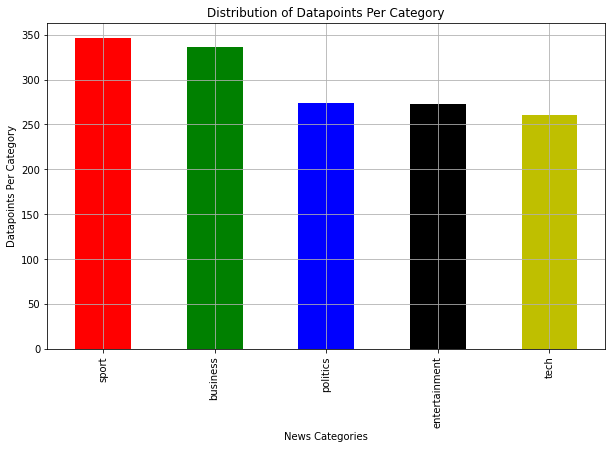

In [ ]:
news_cat = train_data['Category'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
news_cat.plot(kind='bar', color=my_colors)
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.grid()
plt.show()

### Data Pre-processing

Since the data has now been understood, we move on to pre-processing it for our classification task.

As part of preprocessing, we:
* replace every special char with space
* replace multiple spaces with single space
* converting all the chars into lower case
* remove all stop words, that is, if the word is a not a stop word then retain that word from the data

In [ ]:
## This function is for Preprocessing the Textual Data

#loading_the_stop_words_from_nltk_library_
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [ ]:
#train_data_text_processing_stage_
for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses 168m payout eighteen former enron...,business


### Training the Classifiers

As all the pre-processing are complete, it is time to finally train our classifiers and as part of this project we will be using 2 classifiers you all are already familier with - Random forest and KNN.

In addition to just training, we will also be putting into use the concept of Cross Validation, for which we will also plot the we will plot the errors with respect to different parameter values. We split the train and CV data as 80 and 20.

The error we will be minimising is log loss and to compare the performances of the 2 classifiers, we will be using accuracy as the matrix and also printing the confusion matrices for a clearer picture.

In [ ]:
X_train = train_data
y_train = train_data['Category']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)


In [ ]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 1192
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 298


We also understand the distribution of data samples across categories for our train set and the CV set, this is to see that our split was for a fact proportionate.

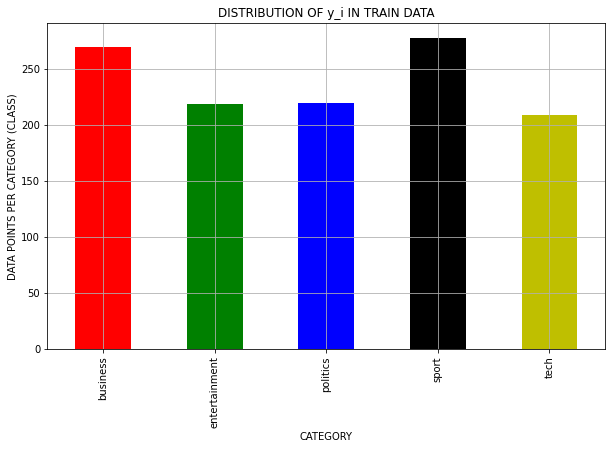

NUMBER OF DATA POINTS IN CLASS 4 : 277 ( 23.238 %)
NUMBER OF DATA POINTS IN CLASS 1 : 269 ( 22.567 %)
NUMBER OF DATA POINTS IN CLASS 3 : 219 ( 18.372 %)
NUMBER OF DATA POINTS IN CLASS 2 : 218 ( 18.289 %)
NUMBER OF DATA POINTS IN CLASS 5 : 209 ( 17.534 %)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


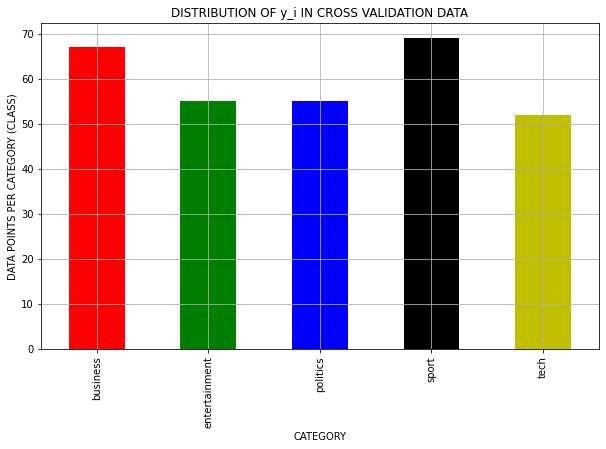

NUMBER OF DATA POINTS IN CLASS 4 : 69 ( 23.154 %)
NUMBER OF DATA POINTS IN CLASS 1 : 67 ( 22.483 %)
NUMBER OF DATA POINTS IN CLASS 2 : 55 ( 18.456 %)
NUMBER OF DATA POINTS IN CLASS 3 : 55 ( 18.456 %)
NUMBER OF DATA POINTS IN CLASS 5 : 52 ( 17.45 %)


In [ ]:
#this_returns_a_dict_keys_as_class_labels_and_values_as_the_number_of_data_points_in_that_class
train_class_distribution = X_train['Category'].value_counts().sort_index()
cv_class_distribution = X_cv['Category'].value_counts().sort_index()

#distribution_of y_i's_in_train_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN TRAIN DATA')
plt.grid()
plt.show()

#-(train_class_distribution.values):_the_minus_sign_will_returns_in_decreasing_order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',train_class_distribution.values[i],'(',np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3),'%)')

print("-."*50)
#distribution_of y_i's_in_cv_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN CROSS VALIDATION DATA')
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',cv_class_distribution.values[i],'(',np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3),'%)')


In [ ]:
#building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names()

#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))

Total Number of Unique Words in Train Data : 9212


In [ ]:
#normalize every feature
train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
cv_text_ohe = text_vectorizer.transform(X_cv['Text'])

#don't forget to normalize every feature
cv_text_ohe = normalize(cv_text_ohe, axis=0)

In [ ]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [1,2,3,4,5,6]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


Training the Random Forest Classifier

for n_estimators = 100 and max depth = 5
Log Loss : 0.2812396143198068
for n_estimators = 100 and max depth = 10
Log Loss : 0.2408868496165654
for n_estimators = 200 and max depth = 5
Log Loss : 0.263481101759539
for n_estimators = 200 and max depth = 10
Log Loss : 0.23488200639081425
for n_estimators = 500 and max depth = 5
Log Loss : 0.25484691721600705
for n_estimators = 500 and max depth = 10
Log Loss : 0.2318821306413611
for n_estimators = 1000 and max depth = 5
Log Loss : 0.2555231140142462
for n_estimators = 1000 and max depth = 10
Log Loss : 0.23303281334385575
for n_estimators = 2000 and max depth = 5
Log Loss : 0.25310368976425535
for n_estimators = 2000 and max depth = 10
Log Loss : 0.23175849210034435


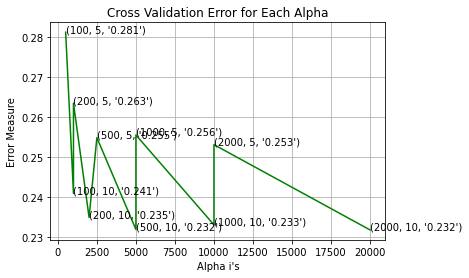

For values of best estimator = 2000 The train log loss is: 0.07168250490706175
For values of best estimator = 2000 The cross validation log loss is: 0.23175849210034435


In [ ]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]

cv_log_error_array = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =",i,"and max depth =",j)
        
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_text_ohe, y_train)
        
        rf_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        rf_sig_clf.fit(train_text_ohe, y_train)
        
        sig_clf_probs = rf_sig_clf.predict_proba(cv_text_ohe)
        
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_text_ohe, y_train)

rf_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
rf_sig_clf.fit(train_text_ohe, y_train)

predict_y = rf_sig_clf.predict_proba(train_text_ohe)
print('For values of best estimator =', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = rf_sig_clf.predict_proba(cv_text_ohe)
print('For values of best estimator =', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
from sklearn.metrics import accuracy_score

predicted_y = rf_sig_clf.predict(cv_text_ohe)
train_accuracy = (rf_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Random Forest Train Accuracy -",train_accuracy)
print("Random Forest CV Accuracy -",cv_accuracy)

Random Forest Train Accuracy - 99.49664429530202
Random Forest CV Accuracy - 92.9530201342282


---------------------------------------- Confusion Matrix ----------------------------------------


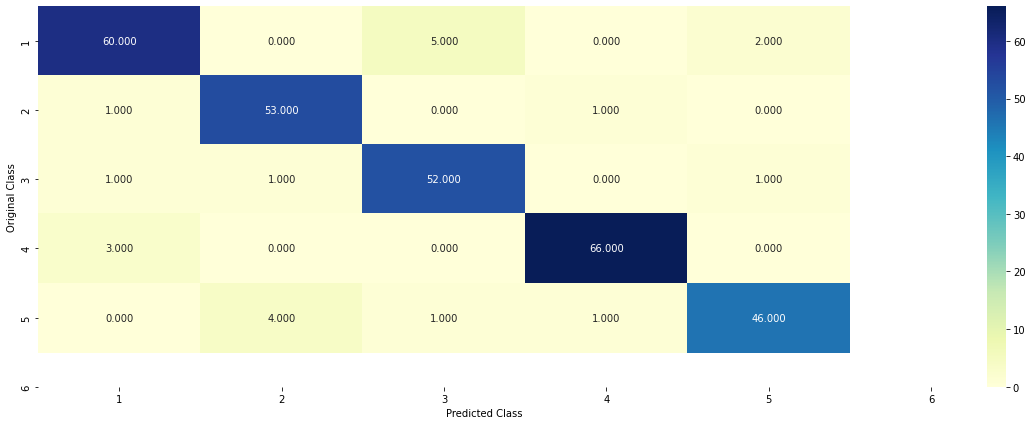

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


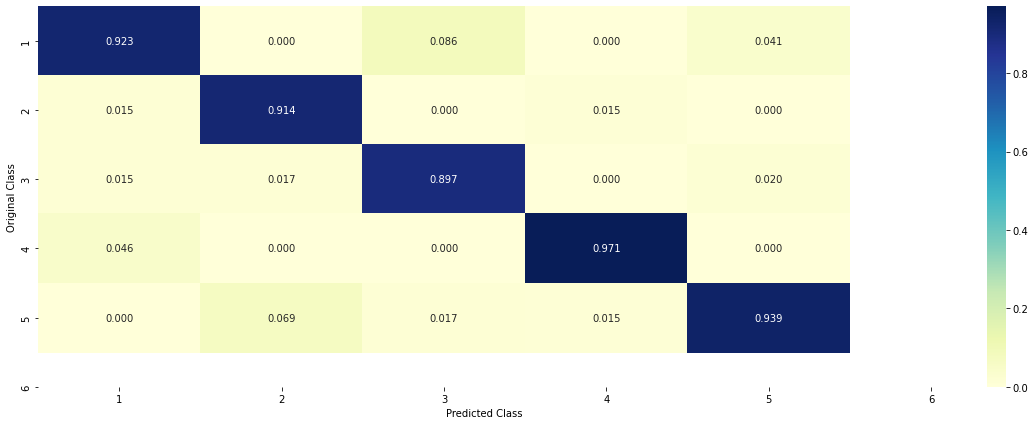

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


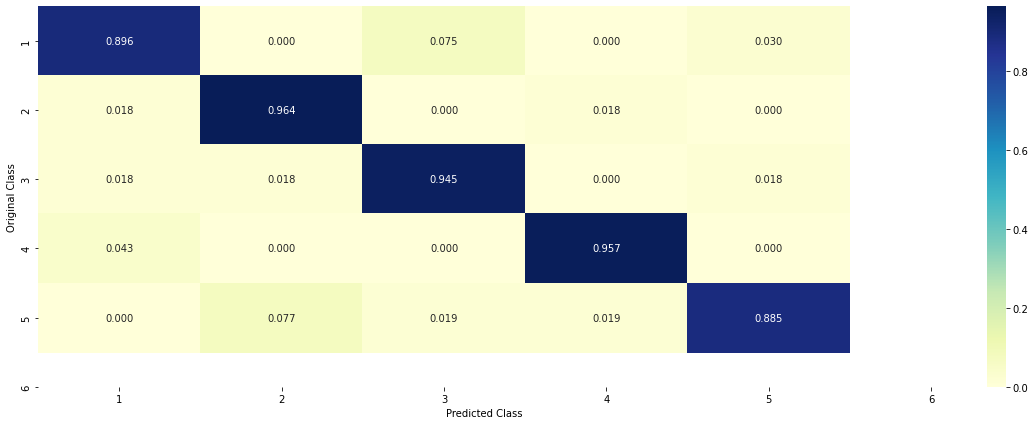

In [ ]:
plot_confusion_matrix(y_cv, rf_sig_clf.predict(cv_text_ohe.toarray()))

Training the KNN Classifier

for alpha = 5
Log Loss : 1.0444689806114684
for alpha = 11
Log Loss : 0.8999366567689364
for alpha = 15
Log Loss : 0.8189553668955447
for alpha = 21
Log Loss : 0.762578603066164
for alpha = 31
Log Loss : 0.6882259186642607
for alpha = 41
Log Loss : 0.6305232565094372
for alpha = 51
Log Loss : 0.6311806236040777
for alpha = 99
Log Loss : 0.5310668198094398


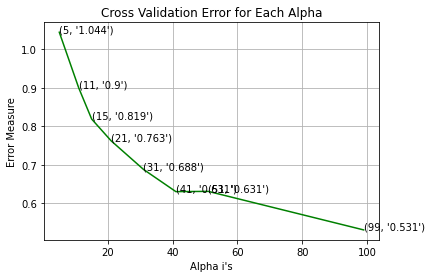

For values of best alpha = 99 The train log loss is: 0.452654519716482
For values of best alpha = 99 The cross validation log loss is: 0.5310668198094398


In [ ]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error_array = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(train_text_ohe, y_train) #knn may not good at handling large dimensionality
    
    knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    knn_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = knn_sig_clf.predict_proba(cv_text_ohe)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
knn_sig_clf.fit(train_text_ohe, y_train)

predict_y = knn_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = knn_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
predicted_y = knn_sig_clf.predict(cv_text_ohe)
train_accuracy = (knn_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("K Nearest Neighbor Train Accuracy -",train_accuracy)
print("K Nearest Neighbor CV Accuracy -",cv_accuracy)

K Nearest Neighbor Train Accuracy - 93.45637583892618
K Nearest Neighbor CV Accuracy - 83.22147651006712


---------------------------------------- Confusion Matrix ----------------------------------------


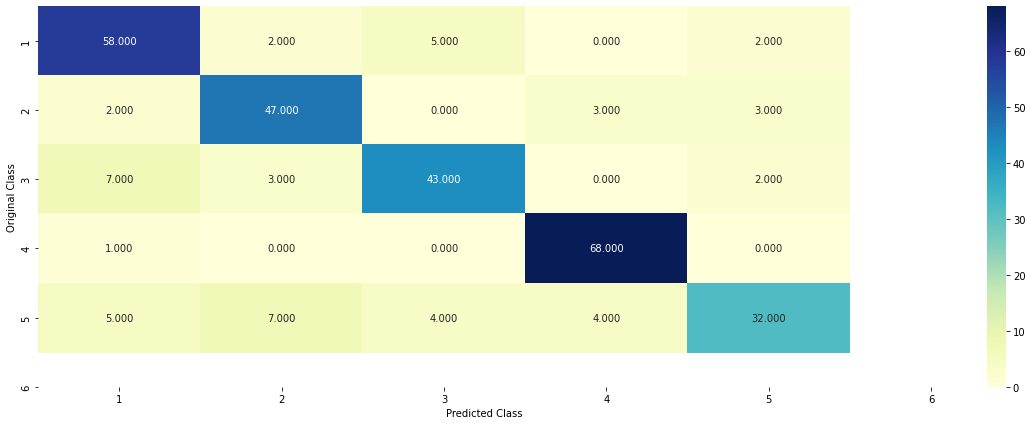

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


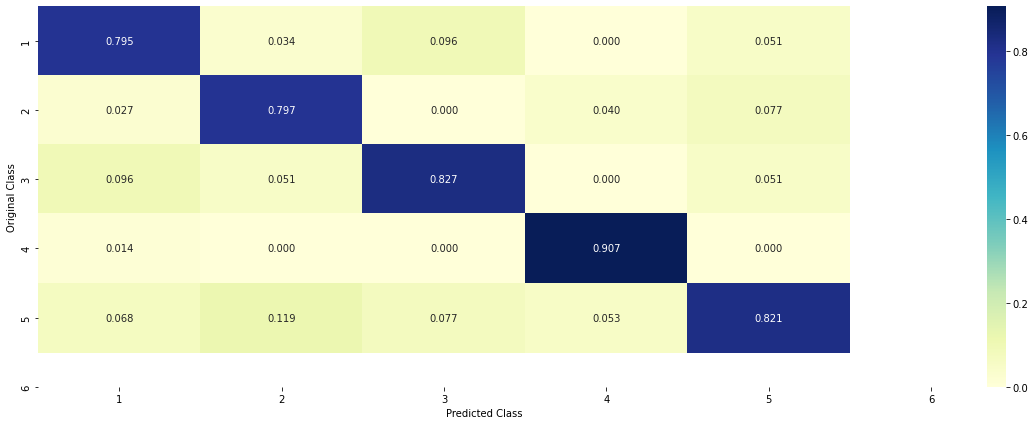

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


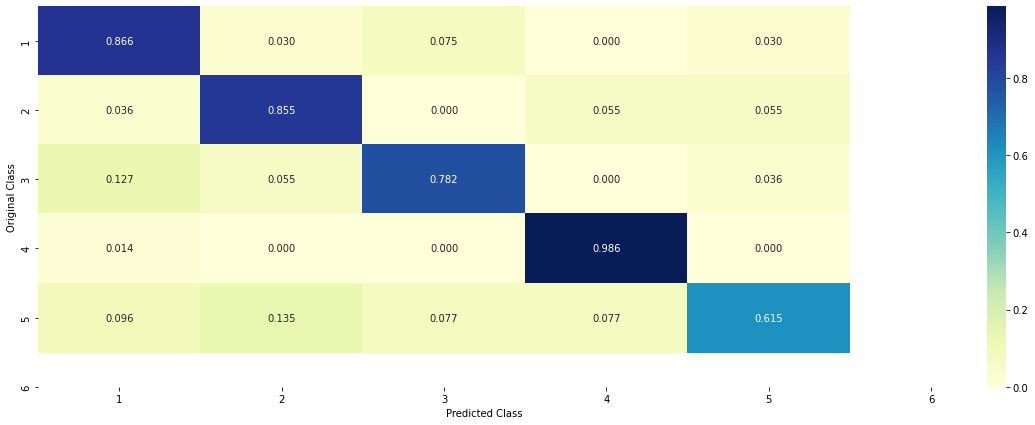

In [ ]:
plot_confusion_matrix(y_cv, knn_sig_clf.predict(cv_text_ohe.toarray()))

We have come to the end of the training process, and as we see, the Random Forest Classifier outperforms the KNN in Train and CV accuracy and hence we will be working with the former from now on.



---



### Working with Test Data

Now that we have completed working with the Train Data - we have understood the data, preprocessed it and even trained two classification models. We will now move towards working with the actual Test Data and see how our best model, the Random Forest Classifier, works with the Test Data.

In [ ]:
# Uploading the BBC News Test.csv file here 
test_data = pd.read_csv("https://raw.githubusercontent.com/SP9144/FMML_Project_Lec8/main/BBC%20News%20Test.csv?token=GHSAT0AAAAAABS2G2K3OKFDYKI6ZOMQZGBSYR3SUVA")

In [ ]:
test_data.head()

,ArticleId,Text
0,1018,worldcom ex boss launches defence lawyers defe...
1,1319,german business confidence slides german busin...
2,1138,bbc poll indicates economic gloom citizens maj...
3,459,lifestyle governs mobile choice faster better ...
4,1020,enron bosses 168m payout eighteen former enron...


In [ ]:

# Check for null values in Test Data


test_data.isna().sum()

ArticleId    0
Text         0
dtype: int64

In [ ]:

# Preprocess the test data the same we preprocessed the train data
# test_data_text_processing_stage_


for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', test_data)
    else:
        print("Text description absent for ID :",index)

test_data.head()

,ArticleId,Text
0,1018,worldcom ex boss launches defence lawyers defe...
1,1319,german business confidence slides german busin...
2,1138,bbc poll indicates economic gloom citizens maj...
3,459,lifestyle governs mobile choice faster better ...
4,1020,enron bosses 168m payout eighteen former enron...


In [ ]:

# Using the same vectorizer that was trained on train data and then normalize every feature

X_test = test_data
y_test = test_data['Text']

text_vectorizer = CountVectorizer(min_df=5)
test_text_ohe = text_vectorizer.fit_transform(X_test['Text'])

In [ ]:

# Now normalizing every feature


test_text_ohe = normalize(test_text_ohe, axis=0)

In [ ]:

# Using the RandomForest Classifier trained above to get the Test Data Predictions
##############################################################################
test_final_ohe = cv_text_ohe.toarray()
test_final_list = test_final_ohe.tolist()

test_final_list[:6]


[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2626128657194451,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [ ]:
test_data['Category'] = test_final_list
test_data.head(20)

In [ ]:
test_data = test_data.drop("Text", axis=1)
test_data.head(20)

,ArticleId
0,1018
1,1319
2,1138
3,459
4,1020
5,51
6,2025
7,1479
8,27
9,397


References: https://www.kaggle.com/competitions/learn-ai-bbc/overview